In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
conn = sqlite3.connect('../data/movies.db')
print("Connected to database successfully!")

Connected to database successfully!


In [4]:
users = pd.read_sql('SELECT * FROM users', conn)
movies = pd.read_sql('SELECT * FROM movies', conn)
ratings = pd.read_sql('SELECT * FROM ratings', conn)

In [12]:
print("=== DATA QUALITY CHECK ===")
print(f"Users table: {users.shape}")
print(f"    Missing values:\n{users.isnull().sum()}")

print(f"\nMovies table: {movies.shape}")
print(f"    Missing values:\n{movies.isnull().sum()}")
print(f"    With plot_keywords: {movies['plot_keywords'].notna().sum()} ({movies['plot_keywords'].notna().sum()/len(movies)*100:.1f}%)")

print(f"\nRatings table: {ratings.shape}")
print(f"    Missing values:\n{ratings.isnull().sum()}")
print(f"    Rating range: {ratings['rating'].min()} to {ratings['rating'].max()}")
print(f"    Unique users: {ratings['user_id'].nunique()}")
print(f"    Unique movies: {ratings['movie_id'].nunique()}")

=== DATA QUALITY CHECK ===
Users table: (610, 1)
    Missing values:
user_id    0
dtype: int64

Movies table: (9742, 6)
    Missing values:
movie_id            0
title               0
genres              0
imdb_id             0
imdb_url         6203
plot_keywords    6212
dtype: int64
    With plot_keywords: 3530 (36.2%)

Ratings table: (100836, 4)
    Missing values:
user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64
    Rating range: 0.5 to 5.0
    Unique users: 610
    Unique movies: 9724


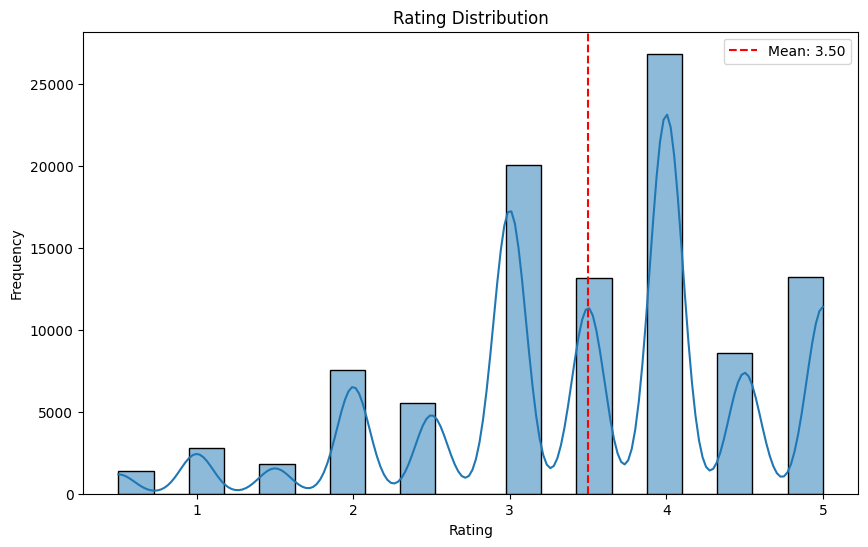

In [18]:
# Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(ratings['rating'].mean(), color='red', linestyle='--',          label=f'Mean: {ratings["rating"].mean():.2f}')
plt.legend()
plt.show()

In [20]:
print("Rating Statistics:")
print(" - Mean rating:", round(ratings['rating'].mean(), 2))
print(" - Median rating:", ratings['rating'].median())
print(" - Standard deviation:", round(ratings['rating'].std(), 2))
print(" - Skewness:", round(ratings['rating'].skew(), 2))

Rating Statistics:
 - Mean rating: 3.5
 - Median rating: 3.5
 - Standard deviation: 1.04
 - Skewness: -0.64
